In [ ]:
pip install xarray netcdf4 matplotlib

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# 1

In [4]:
# 1a)
gleam = xr.open_dataset('data/gleam_europe_monmean_reduced.nc')
print(gleam.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 252)>
array(['2000-01-16T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-16T00:00:00.000000000', ..., '2020-10-16T00:00:00.000000000',
       '2020-11-15T12:00:00.000000000', '2020-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time coordinate
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 254)>
array([-11.375, -11.125, -10.875, ...,  51.375,  51.625,  51.875],
      dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude coordinate
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 100)>
array([59.875, 59.625, 59.375, 59.125, 58.875, 58.625, 58.375, 58.125, 57.875,
       57.625, 57.375, 57.125, 56.875, 56.625, 56.375, 56.125, 55.875, 55.625,
       55.375, 55.125, 54.875, 54.625, 54.375, 54.125, 53.875, 53.625, 53.375,
       53.125, 52.875, 52.625, 52

In [5]:
# 1b)
print(gleam.attrs['StartDate']) # 2000-01-01
print(gleam.attrs['EndDate']) # 2020-12-31

2000-01-01
2020-12-31


# 2

In [6]:
# 2a)
print(gleam.evaporation.units) # mm/month

mm/month


In [7]:
# 2b)
evaporation = gleam['evaporation']
print(evaporation.min())
print(evaporation.max())
print(evaporation.mean())

<xarray.DataArray 'evaporation' ()>
array(-6.02, dtype=float32)
<xarray.DataArray 'evaporation' ()>
array(212.65, dtype=float32)
<xarray.DataArray 'evaporation' ()>
array(42.692245, dtype=float32)


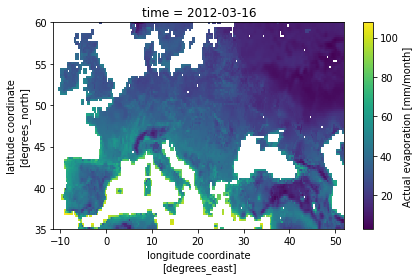

In [8]:
# 2c)
evaporation.sel(time='2012-03-16').plot()
plt.tight_layout()
plt.show()

# 3

In [9]:
# 3a)
season_grouped = evaporation.groupby('time.season')

In [10]:
# 3b)
seasonal_average = season_grouped.mean(dim='time')

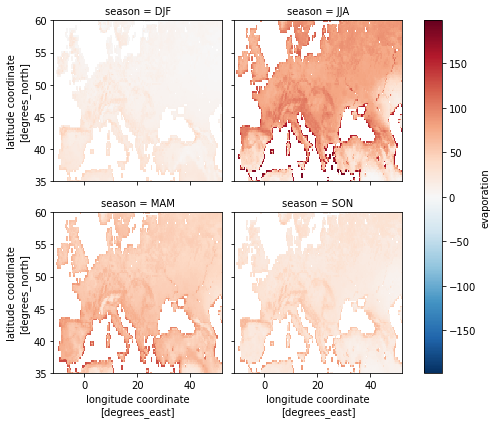

In [11]:
# 3c)
seasonal_average.plot(x='lon', y='lat', col='season', col_wrap=2)
plt.show()

# 4

In [14]:
# 4a)
gpcp = xr.open_dataset('data/GPCP__V2_3__PRECIP__2.5x2.5.nc')
print(gpcp.dims) # 'time', 'lon', 'lat'
print(gpcp.dims['lon']*gpcp.dims['lat'])

Frozen({'lat': 72, 'lon': 144, 'time': 512, 'nv': 2})
10368


In [16]:
# 4b)
print(gpcp.data_vars)
print(gpcp['precip'].long_name)
precipitation = gpcp['precip']

Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Average Monthly Rate of Precipitation


In [17]:
# 4c)
print(f"Minimum precipitation: {precipitation.min()} mm/month")
print(f"Maximum precipitation: {precipitation.max()} mm/month")
print(f"Mean precipitation: {precipitation.mean()} mm/month")

Minimum precipitation: <xarray.DataArray 'precip' ()>
array(0., dtype=float32) mm/month
Maximum precipitation: <xarray.DataArray 'precip' ()>
array(47.327435, dtype=float32) mm/month
Mean precipitation: <xarray.DataArray 'precip' ()>
array(2.2401018, dtype=float32) mm/month


# 5

In [18]:
# 5a)
# Leipzig; Longitude: 12.37, Latitude: 51.34
precipitation_town = precipitation.sel(lon=12.37, lat=51.34, method='nearest')

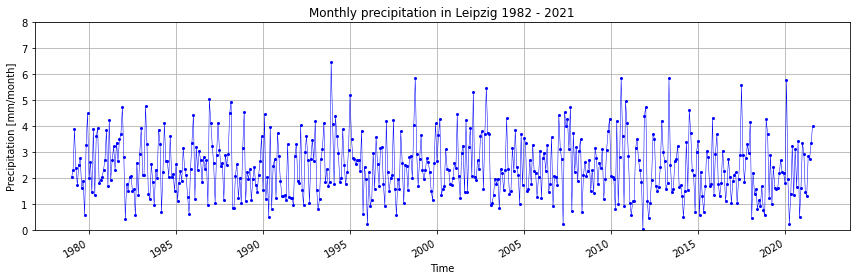

In [23]:
# 5b)
precipitation_town.plot(aspect=3, size=4, linestyle='-', linewidth='0.5', color='blue', marker='.', ms=4)
plt.title('Monthly precipitation in Leipzig 1982 - 2021')
plt.ylabel('Precipitation [mm/month]')
plt.ylim(0, 8)
plt.grid()
plt.tight_layout()
plt.show()